This dataset represents a set of possible advertisements on
   Internet pages.  The features encode the geometry of the image (if
   available) as well as phrases occuring in the URL, the image's URL and
   alt text, the anchor text, and words occuring near the anchor text.
   
   The task is to predict whether an image is an advertisement ("ad") or
   not ("nonad").




In [ ]:
pwd

'/content/drive/MyDrive/ML-Course/Project_2'

In [4]:
import numpy as np
import pandas as pd

In [3]:
# https://bit.ly/307l3GF    يمكن تحميل البيانات من الموقع التالي

df = pd.read_csv('../data/ad.csv',  header=None)
# try to load with   header off

/tmp/ipykernel_24144/2497216724.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/ad.csv',  header=None)


In [ ]:
# احيانا تكون البيانات جاهزة وتم ترميزها كماهو الحال هنا

df.sample(4)

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
1052,50,50,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
872,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
2874,23,26,1.1304,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
2900,12,57,4.75,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


## Feature Engineering

In [ ]:
df.shape

(3279, 1559)

In [ ]:
df.keys()

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558],
      dtype='int64', length=1559)

In [ ]:
#  تحديد تصنيفات الهدف
df.iloc[:, -1].value_counts()

,count
1558,
nonad.,2820
ad.,459


In [ ]:
# ad :  اشهار
# nonad:  ليس بالاشهار

In [ ]:
df.dtypes

,0
0,object
1,object
2,object
3,object
4,int64
...,...
1554,int64
1555,int64
1556,int64
1557,int64


In [ ]:
df.select_dtypes("object").columns

Index([0, 1, 2, 3, 1558], dtype='int64')

In [ ]:
for key in df.select_dtypes("object").columns:
    print(key, df[key].nunique())

0 221
1 278
2 781
3 5
1558 2


In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
1554,0
1555,0
1556,0
1557,0


In [ ]:
df[df.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558


In [ ]:
for key in df.select_dtypes("object").columns:
    print(key, df[key].unique())

0 [' 125' '  57' '  33' '  60' '  59' '   ?' '  90' '  30' '  35' '  72'
 '  50' ' 120' '   2' '  65' '  44' '  80' '  64' '  31' ' 100' '  74'
 '  93' '  21' '  20' '  55' ' 135' '  26' ' 136' ' 124' '  52' '  45'
 ' 165' '  25' ' 105' '  88' '  73' '  43' ' 477' '  70' '  40' ' 240'
 '  51' '  68' ' 171' '  71' '  29' '  38' '  36' '  46' '  12' '  95'
 '  41' '  96' '  16' ' 150' ' 159' ' 110' ' 161' '  15' ' 195' '  11'
 ' 114' ' 160' '  63' ' 134' '  24' '  62' ' 106' ' 200' '  39' ' 115'
 '  75' '  10' ' 207' '  32' '  27' '  48' ' 107' '  28' '  23' '  54'
 ' 102' ' 149' ' 119' '  76' '  79' ' 158' ' 154' '   8' ' 153' '  83'
 ' 174' ' 156' ' 128' '  14' ' 172' ' 104' ' 146' '  98' ' 144' ' 175'
 ' 116' ' 145' '  99' ' 220' ' 185' '  34' ' 239' ' 140' ' 262' ' 142'
 ' 191' '  22' '  87' ' 257' '  66' ' 108' ' 359' '  85' ' 132' ' 237'
 ' 131' '  58' '  78' ' 212' '  18' ' 123' '  92' ' 148' '  84' ' 133'
 ' 152' '  69' '  94' '  82' ' 214' '  49' '  61' '  89' '  56' ' 193'
 '  

In [ ]:
df[3].unique()

array(['1', '0', '?', 1, 0], dtype=object)

In [ ]:
df[df[3]=="?"][3].count()

15

In [ ]:

for col in df.keys():
  if df[df[col]=="?"][col].count()>0:
      print(col)


3


In [ ]:
# 1. Replace "?" with NaN (NumPy's representation of missing values)
# df[3] = df[3].replace("?", np.nan)

In [ ]:
# نظرا لتواجد قيم ناقصة  توجب  ترميز البيانات
df[3]=df[3].replace({'0':0, '1':1, "?": np.nan})

<ipython-input-34-95b254243a12>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[3]=df[3].replace({'0':0, '1':1, "?": np.nan})


In [ ]:
df[3].unique()

array([ 1.,  0., nan])

In [ ]:
# Using the most_frequent  (good for numerical data that might have outliers)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
#

# 3. Apply the imputer
#    - Fit the imputer on the column with missing values.  This calculates the median (or mean, etc.).
#    - Transform the column, replacing the NaNs with the imputed values.
#    - IMPORTANT:  SimpleImputer expects a 2D array, so we use double brackets [[]] to select the column.

df[3] = imputer.fit_transform(df[[3]])

In [ ]:
#  تغيير طبيعة البيانات النصية
df[3].astype("int64")

,3
0,1
1,1
2,1
3,1
4,1
...,...
3274,0
3275,1
3276,1
3277,1


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [ ]:
# target values
df.iloc[:, -1].unique()

array(['ad.', 'nonad.'], dtype=object)

In [ ]:
# encodage
((df.iloc[:, -1]=='ad.')+0).head()

,1558
0,1
1,1
2,1
3,1
4,1


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [ ]:
pd.DataFrame( {"ADs": df.iloc[:, -1], "Ads_Encoded":((df.iloc[:, -1]=='ad.')+0)} ).sample(8, random_state=42)

,ADs,Ads_Encoded
2948,nonad.,0
2782,nonad.,0
1644,nonad.,0
70,ad.,1
2045,nonad.,0
263,ad.,1
1042,nonad.,0
2263,nonad.,0


In [ ]:
df.iloc[:, -1]=((df.iloc[:, -1]=='ad.')+0)

In [ ]:
df.iloc[:, -1].sample(5, random_state=42)

,1558
2948,0
2782,0
1644,0
70,1
2045,0


## Data Splitting

In [ ]:
df.iloc[:, :-1].head()

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,125,125,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,468,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33,230,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60,468,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,468,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# تحديد الخصائص والهدف
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [ ]:
# display type of y
y=y.astype("int")

In [ ]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [ ]:
# حجم البيانات
X_train.shape, X_test.shape

((2196, 1558), (1083, 1558))

## Model

In [ ]:
!pip install -U scikit-learn

In [ ]:

from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline



num_pipeline= make_pipeline(
    SimpleImputer(strategy="most_frequent" ),# تحديد الوسيط كبديل عن كل القيم الناقصة في الجدول  " most_frequent"
    StandardScaler()    # تغيير سلم البيانات الرقمية
)

cat_pipeline= make_pipeline(
    OneHotEncoder(handle_unknown="ignore"  , sparse_output=False))  #   بما ان جميع القيم الناقصة قد تم تعويضا فلا فائدة من معالجتها لذا نقوم هنا باسقاط احد العمودين في حالة المتغير الثنائي



preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية
     (cat_pipeline, selector(dtype_include="object")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية
     )

In [ ]:
# التحقق من تحويل  البيانات
preprocess.fit_transform(X_train)

array([[-1.86346588, -0.07095298, -0.1115712 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53663446, -0.07095298, -0.1115712 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53663446, -0.07095298, -0.1115712 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.86346588, -0.07095298, -0.1115712 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53663446, -0.07095298, -0.1115712 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53663446, -0.07095298, -0.1115712 , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# حجم  البيانات
preprocess.fit_transform(X_train).shape

(2196, 2575)

In [ ]:

#  هيكل نموذج خوارزمية التنبؤ
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
pipe_DTC= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية
    PCA( ),  #    يعوض لاحقا ضمن المعايير أدناه
    DecisionTreeClassifier(criterion='entropy')
)

In [ ]:
from sklearn import set_config
set_config(display='diagram', )

In [ ]:
# تدريب البيانات
pipe_DTC.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff0ea97310>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff0ea97210>)])),
                ('pca', PCA()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy'))])

In [ ]:
#pipeline  معايير
list(pipe_DTC.get_params().keys())

['memory',
 'steps',
 'transform_input',
 'verbose',
 'columntransformer',
 'pca',
 'decisiontreeclassifier',
 'columntransformer__force_int_remainder_cols',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__verbose_feature_names_out',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__transform_input',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__simpleimputer',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__simpleimputer__add_indicator',
 'columntransformer__pipeline-1__simpleimputer__copy',
 'columntransformer__pipeline-1__simpleimputer__fill_value',
 'columntransformer__pipeline-1__simpleimputer__keep_emp

## HyperParameters

In [ ]:
param_grid = {
        'decisiontreeclassifier__max_depth': (150, 155, 160),
        'decisiontreeclassifier__min_samples_split': (2, 3),
        'decisiontreeclassifier__min_samples_leaf': (1, 2, 3),
        'pca__n_components':[40, 60, 80]

}

## Training

In [ ]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)


In [ ]:
# AUC and accuracy as score
# from sklearn.metrics import accuracy_score, make_scorer
# scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}

In [ ]:
# %%timeit
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(pipe_DTC, param_grid, cv=kf, verbose=3, n_jobs=-1 ,scoring= "f1"  )

param_grid Combinations:

'**decisiontreeclassifier__max_depth**': 3 options (150, 155, 160)
'**decisiontreeclassifier__min_samples_split**': 3 options (1, 2, 3)
'**decisiontreeclassifier__min_samples_leaf**': 3 options (1, 2, 3)
'**pca__n_components**': 3 options (40, 60, 80)
To get the total number of hyperparameter combinations, you multiply the number of options for each parameter: 3 * 3 * 3 * 3 = 81

KFold Cross-Validation:

kf = KFold(n_splits=5, ...): You're using 5-fold cross-validation. This means the training data is split into 5 parts (folds). For each combination of hyperparameters, the model is trained on 4 folds and validated on the remaining 1 fold. This process is repeated 5 times, using a different fold as the validation set each time.
Total Fits:

Number of hyperparameter combinations: 81
Number of cross-validation folds: 5
Total fits: 81 * 5 = 405

In [ ]:
# التدريب
gridSearch.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector o...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x77ff0ea97210>)])),
                                       ('pca', PCA()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(criterion='entropy'))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': (150, 155, 160),
                         'decisiontreeclassifier__min_samples_leaf': (1, 2, 3),
                         'decisiontreeclassifier__min_samples_split': (2, 3),
                         'pca__n_components': [40, 60, 80]},
             scoring='f1', verbose=3)

## Evaluation

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
gridSearch.best_params_

{'decisiontreeclassifier__max_depth': 155,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 3,
 'pca__n_components': 60}

In [ ]:
#  قائمة أفضل المعاييير
gridSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff07406d90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x77ff0456bed0>)])),
                ('pca', PCA(n_components=60)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=155,
                                        min_samples_leaf=2,
                                        min_samples_split=3))])

In [ ]:
#AUC    قياس درجة  دقة  التنبؤ لمعيار
f' Best f1  Score:{gridSearch.best_score_:.3}'

' Best f1  Score:0.824'

In [ ]:
# use the best Param to make a prediction
from sklearn import metrics
y_pred=gridSearch.predict(X_test)
f"Accuracy: . {metrics.accuracy_score(y_test, y_pred):.3}"

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
gridSearch.best_estimator_.score(X_test, y_test)

0.948291782086796

In [ ]:
! pip install  scikit-plot

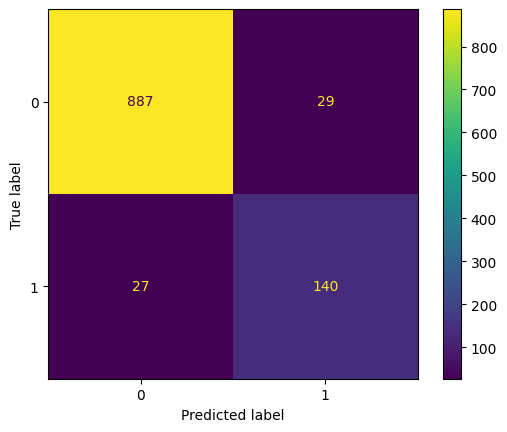

In [ ]:
#  Confusion Matrix  #, normalize=True)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [ ]:
# https://www.datacourses.com/classification-model-evaluation-metrics-in-scikit-learn-924/

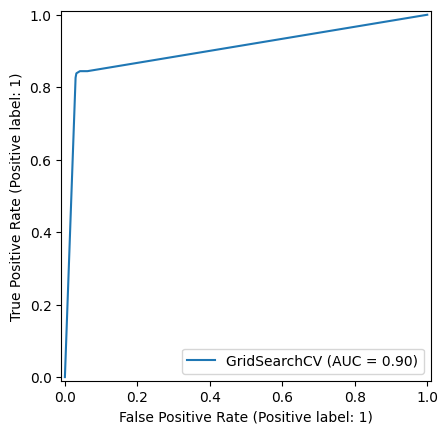

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(gridSearch, X_test, y_test)
plt.show()

A receiver operating characteristic (ROC) curve, is a diagnostic plot that visualizes the behavior of a binary classifier model by calculating the false positive rate and true positive rate by changing the model’s classification/discrimination thresholds. It is essentially a plot of signal (True Positive Rate) versus noise (False Positive Rate)

Going back to the basics, the threshold value is used to define which prediction probability is set to label a given test sample as predicted positive or predicted negative during the classification step. For most models, the default threshold value is 0.5.

In [ ]:
y_probas = gridSearch.predict_proba(X_test)
y_probas[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# AUC تخطيط
# The K-S statistic plot, or the Kolmogorov Smirnov statistic plot, is a plot that tells you whether the model gets confused
#when it comes to predicting the different labels in your dataset

# skplt.metrics.plot_ks_statistic(y_test, y_probas)

In [ ]:
print ('ROC AUC =', metrics.roc_auc_score(y_test, y_probas[:,1]))

ROC AUC = 0.9045478911173286


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       916
           1       0.83      0.84      0.83       167

    accuracy                           0.95      1083
   macro avg       0.90      0.90      0.90      1083
weighted avg       0.95      0.95      0.95      1083



In [ ]:
# عرض جدول القيم التي تم التنبؤ بها ومقارنتها بتلك التي بالجدول الأصلي
pd.DataFrame({"Predicted":y_pred, "Actual Value": y_test}).sample(6, random_state=10)

,Predicted,Actual Value
1128,0,0
1825,0,0
3133,0,0
2915,0,0
109,1,1
1777,0,0


##  Model  XGBClassifier

In [ ]:
#  هيكل نموذج خوارزمية التنبؤ
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
pipe_XGBCl= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية
    PCA(),
    XGBClassifier()
)

In [ ]:
#pipeline  معايير
list(pipe_XGBCl.get_params().keys())

['memory',
 'steps',
 'transform_input',
 'verbose',
 'columntransformer',
 'pca',
 'xgbclassifier',
 'columntransformer__force_int_remainder_cols',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__verbose_feature_names_out',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__transform_input',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__simpleimputer',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__simpleimputer__add_indicator',
 'columntransformer__pipeline-1__simpleimputer__copy',
 'columntransformer__pipeline-1__simpleimputer__fill_value',
 'columntransformer__pipeline-1__simpleimputer__keep_empty_featur

In [ ]:
param_grid = {
   'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    'xgbclassifier__scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
    }

In [ ]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score, f1_score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score ),
    'roc_auc': make_scorer(roc_auc_score),
    'f1_score': make_scorer(f1_score)
}

In [ ]:
# %%timeit
from sklearn.model_selection import RandomizedSearchCV
RdSearch = RandomizedSearchCV(pipe_XGBCl, param_distributions=param_grid, cv=kf, verbose=3,
                                n_jobs=-1 ,scoring= scorers   , n_iter=1000 , refit="f1_score" )

In [ ]:
# التدريب
RdSearch.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


## Evaluation

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
RdSearch.best_params_

In [ ]:
#  قائمة أفضل المعاييير
RdSearch.best_estimator_

In [ ]:
#AUC    قياس درجة  دقة  التنبؤ لمعيار
f' Best f1  Score:{RdSearch.best_score_:.3}'

In [ ]:
from sklearn import metrics
y_pred=RdSearch.predict(X_test)
f"Accuracy: . {metrics.accuracy_score(y_test, y_pred):.3}"

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
RdSearch.best_estimator_.score(X_test, y_test)

In [ ]:
! pip install  scikit-plot

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #, normalize=True)

In [ ]:
# https://www.datacourses.com/classification-model-evaluation-metrics-in-scikit-learn-924/

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(RdSearch, X_test, y_test)

A receiver operating characteristic (ROC) curve, is a diagnostic plot that visualizes the behavior of a binary classifier model by calculating the false positive rate and true positive rate by changing the model’s classification/discrimination thresholds. It is essentially a plot of signal (True Positive Rate) versus noise (False Positive Rate)

Going back to the basics, the threshold value is used to define which prediction probability is set to label a given test sample as predicted positive or predicted negative during the classification step. For most models, the default threshold value is 0.5.

In [ ]:
#
y_probas = gridSearch.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [ ]:
y_probas = RdSearch.predict_proba(X_test)
y_probas[:3]

In [ ]:
# AUC تخطيط
# The K-S statistic plot, or the Kolmogorov Smirnov statistic plot, is a plot that tells you whether the model gets confused
#when it comes to predicting the different labels in your dataset

skplt.metrics.plot_ks_statistic(y_test, y_probas)

In [ ]:
print ('ROC AUC =', metrics.roc_auc_score(y_test, y_probas[:,1]))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

In [ ]:
# عرض جدول القيم التي تم التنبؤ بها ومقارنتها بتلك التي بالجدول الأصلي
pd.DataFrame({"Predicted":y_pred, "Actual Value": y_test}).sample(6, random_state=10)